In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# CARREGA DATASET
df_train = pd.read_csv('../Dataset/Train/train.csv', engine='python', sep=',')
df_test = pd.read_csv('../Dataset/Train/test.csv', engine='python', sep=',')

In [89]:
# DADOS DE TREINAMENTO E TESTE

X_train = df_train.drop(columns=['class', 'sub_class'], axis=1)
X_test = df_test.drop(columns=['class', 'sub_class'])

y_train = df_train['class']
y_test = df_test['class']

In [90]:
# IMPORTANDO O MODELO KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [91]:
# DEFININDO O NÚMERO DOS K VIZINHOS
classifier = KNeighborsClassifier(n_neighbors=8)  

# TREINANDO O MODELO
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [92]:
# PREVENDO VALORES DE Y PARA OS DADOS DE TESTE (X_test)
y_pred = classifier.predict(X_test) 

<AxesSubplot:>

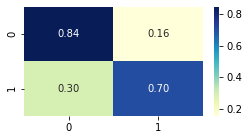

In [93]:
# IMPORTANDO PARA VALIDAÇÃO DO MODELO
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# MATRIZ DE CONFUSÃO
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt=".2f")

RELATÓRIO DE CLASSIFICAÇÃO: 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79      7372
           1       0.82      0.70      0.76      7312

    accuracy                           0.77     14684
   macro avg       0.78      0.77      0.77     14684
weighted avg       0.78      0.77      0.77     14684



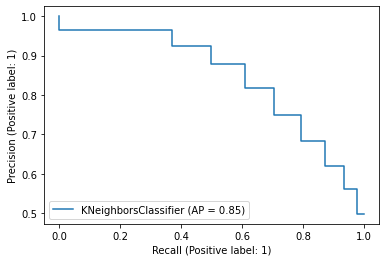

In [94]:
# RELATÓRIO DE CLASSIFICAÇÃO
print("RELATÓRIO DE CLASSIFICAÇÃO: \n", classification_report(y_test, y_pred)) 
cr = classification_report(y_test, y_pred, labels=[0,1], output_dict=True)

# PRECISION X RECALL
disp = plot_precision_recall_curve(classifier, X_test, y_test)

In [95]:
print('ACURÁCIA: %.5f' % accuracy_score(y_test, y_pred))
print('PRECISION: %.5f' % precision_score(y_test, y_pred))
print('RECALL: %.5f' % recall_score(y_test, y_pred))
print('F1 SCORE: %.5f' % f1_score(y_test, y_pred))

ACURÁCIA: 0.77452
PRECISION: 0.81749
RECALL: 0.70446
F1 SCORE: 0.75678


In [ ]:
# CALCULANDO O VALOR DE ERRO DE K

In [79]:
error = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Média de Erro')

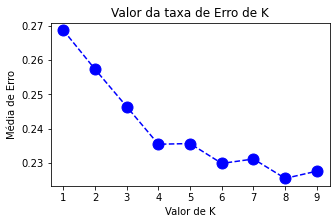

In [86]:
# GRÁFICO PARA MELHOR VALOR DE K

plt.figure(figsize=(5, 3))  
plt.plot(range(1, 10), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=11)
plt.title('Valor da taxa de Erro de K')  
plt.xlabel('Valor de K')  
plt.ylabel('Média de Erro') 

In [96]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [97]:
for i, score in enumerate(cross_val_score(classifier, X_train, y_train, cv=5)):
    print(f"Acurácia K-fold no. {i} : {score}")

Acurácia K-fold no. 0 : 0.7721120286030476
Acurácia K-fold no. 1 : 0.7693028007150762
Acurácia K-fold no. 2 : 0.771686388013961
Acurácia K-fold no. 3 : 0.7643653698816719
Acurácia K-fold no. 4 : 0.7656223395198365


In [63]:
# CURVA ROC

In [64]:
from sklearn import metrics
   
# Calculate: fpr and tpr (all thresholds of the classification)
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

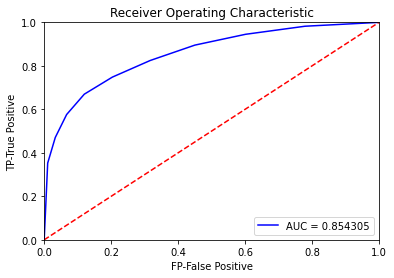

In [65]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TP-True Positive')
plt.xlabel('FP-False Positive')
plt.show()
